In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/quantium-dataset-task-1/QVI_purchase_behaviour.csv
/kaggle/input/quantium-dataset-task-1/QVI_transaction_data.xlsx


In [2]:
import pandas as pd

# Load both files
transactions = pd.read_excel('/kaggle/input/quantium-dataset-task-1/QVI_transaction_data.xlsx')
purchase_behaviour = pd.read_csv('/kaggle/input/quantium-dataset-task-1/QVI_purchase_behaviour.csv')


In [3]:
import pandas as pd

# Load both files
transactions = pd.read_excel('/kaggle/input/quantium-dataset-task-1/QVI_transaction_data.xlsx')
purchase_behaviour = pd.read_csv('/kaggle/input/quantium-dataset-task-1/QVI_purchase_behaviour.csv')

# Fix the DATE column (Excel serial date)
transactions['DATE'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(transactions['DATE'], unit='D')

# Create a MONTH column
transactions['MONTH'] = transactions['DATE'].dt.to_period('M').dt.to_timestamp()

# Merge the two datasets on LYLTY_CARD_NBR
merged_df = pd.merge(transactions, purchase_behaviour, on='LYLTY_CARD_NBR', how='left')

# Check result
print(merged_df.head())


        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2019-05-20          1            1343     383        61   
3 2018-08-17          2            2373     974        69   
4 2018-08-18          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES      MONTH  \
0    Natural Chip        Compny SeaSalt175g         2        6.0 2018-10-01   
1                  CCs Nacho Cheese    175g         3        6.3 2019-05-01   
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9 2019-05-01   
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0 2018-08-01   
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8 2018-08-01   

                LIFESTAGE PREMIUM_CUSTOMER  
0   YOUNG SINGLES/COUPLES          Premium  
1  MIDAGE SINGLES/COUPLES           Budget  
2  MIDAGE SINGLES/COUPL

In [4]:
# Check how many missing values per column
print(merged_df.isnull().sum())

# Check percentage of missing data
print((merged_df.isnull().mean() * 100).round(2))


DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
MONTH               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64
DATE                0.0
STORE_NBR           0.0
LYLTY_CARD_NBR      0.0
TXN_ID              0.0
PROD_NBR            0.0
PROD_NAME           0.0
PROD_QTY            0.0
TOT_SALES           0.0
MONTH               0.0
LIFESTAGE           0.0
PREMIUM_CUSTOMER    0.0
dtype: float64


In [5]:
# Check for duplicate rows
duplicates = merged_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Optional: Drop them
merged_df = merged_df.drop_duplicates()
# Display the duplicated row(s)
duplicates = merged_df[merged_df.duplicated()]
print(duplicates)



Number of duplicate rows: 1
Empty DataFrame
Columns: [DATE, STORE_NBR, LYLTY_CARD_NBR, TXN_ID, PROD_NBR, PROD_NAME, PROD_QTY, TOT_SALES, MONTH, LIFESTAGE, PREMIUM_CUSTOMER]
Index: []


In [6]:
merged_df = merged_df.drop_duplicates()
# Display the duplicated row(s)

In [7]:
print(f"Duplicates remaining: {merged_df.duplicated().sum()}")

Duplicates remaining: 0


In [8]:
print(merged_df.dtypes)


DATE                datetime64[ns]
STORE_NBR                    int64
LYLTY_CARD_NBR               int64
TXN_ID                       int64
PROD_NBR                     int64
PROD_NAME                   object
PROD_QTY                     int64
TOT_SALES                  float64
MONTH               datetime64[ns]
LIFESTAGE                   object
PREMIUM_CUSTOMER            object
dtype: object


In [9]:
merged_df['LIFESTAGE'] = merged_df['LIFESTAGE'].astype('category')
merged_df['PREMIUM_CUSTOMER'] = merged_df['PREMIUM_CUSTOMER'].astype('category')


In [10]:
# Check for Outliers...Focus: PROD_QTY and TOT_SALES
print(merged_df[['PROD_QTY', 'TOT_SALES']].describe())


            PROD_QTY      TOT_SALES
count  264835.000000  264835.000000
mean        1.907308       7.304205
std         0.643655       3.083231
min         1.000000       1.500000
25%         2.000000       5.400000
50%         2.000000       7.400000
75%         2.000000       9.200000
max       200.000000     650.000000


In [11]:
filtered_df = merged_df[merged_df['PROD_QTY'] <= 5].copy()


In [12]:
print(merged_df.columns)


Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'MONTH', 'LIFESTAGE',
       'PREMIUM_CUSTOMER'],
      dtype='object')


In [13]:
# Number of unique stores
print("Unique STORE_NBR count:", merged_df['STORE_NBR'].nunique())

# Number of unique loyalty cards
print("Unique LYLTY_CARD_NBR count:", merged_df['LYLTY_CARD_NBR'].nunique())

# Distribution of LIFESTAGE values
print("\nLIFESTAGE value counts:")
print(merged_df['LIFESTAGE'].value_counts(dropna=False))

# Distribution of PREMIUM_CUSTOMER values
print("\nPREMIUM_CUSTOMER value counts:")
print(merged_df['PREMIUM_CUSTOMER'].value_counts(dropna=False))


Unique STORE_NBR count: 272
Unique LYLTY_CARD_NBR count: 72637

LIFESTAGE value counts:
LIFESTAGE
OLDER SINGLES/COUPLES     54478
RETIREES                  49763
OLDER FAMILIES            48596
YOUNG FAMILIES            43592
YOUNG SINGLES/COUPLES     36377
MIDAGE SINGLES/COUPLES    25110
NEW FAMILIES               6919
Name: count, dtype: int64

PREMIUM_CUSTOMER value counts:
PREMIUM_CUSTOMER
Mainstream    101988
Budget         93157
Premium        69690
Name: count, dtype: int64


In [14]:
print(filtered_df.info())
print(filtered_df.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
Index: 264833 entries, 0 to 264835
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264833 non-null  datetime64[ns]
 1   STORE_NBR         264833 non-null  int64         
 2   LYLTY_CARD_NBR    264833 non-null  int64         
 3   TXN_ID            264833 non-null  int64         
 4   PROD_NBR          264833 non-null  int64         
 5   PROD_NAME         264833 non-null  object        
 6   PROD_QTY          264833 non-null  int64         
 7   TOT_SALES         264833 non-null  float64       
 8   MONTH             264833 non-null  datetime64[ns]
 9   LIFESTAGE         264833 non-null  category      
 10  PREMIUM_CUSTOMER  264833 non-null  category      
dtypes: category(2), datetime64[ns](2), float64(1), int64(5), object(1)
memory usage: 20.7+ MB
None
                                 DATE      STORE_NBR  LYLTY_CARD_NBR  \
count  

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [15]:
filtered_df.isnull().sum()


DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
MONTH               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [16]:
# Generate full range of dates in your dataset
date_range = pd.date_range(start=filtered_df['DATE'].min(), end=filtered_df['DATE'].max())

# Identify missing dates
missing_dates = set(date_range.date) - set(filtered_df['DATE'].dt.date.unique())

# Specifically check for Christmas Day
is_christmas_missing = pd.to_datetime('2018-12-25').date() in missing_dates

# Print results
print("Missing Dates:", sorted(missing_dates))
print("Is Christmas Day (Dec 25) missing?:", is_christmas_missing)


Missing Dates: [datetime.date(2018, 12, 25)]
Is Christmas Day (Dec 25) missing?: True


### Holiday Gap Check – Missing Transaction Dates

We performed a check for any missing calendar dates within the transaction period in `filtered_df`.  
It was identified that **December 25, 2018 (Christmas Day)** is not included in the dataset. This is likely due to store closure on that public holiday, which is expected.  
No corrective action is required, but this gap is acknowledged for completeness.


In [17]:
#Rename the DataFrame
filtered_transactions_data = filtered_df.copy()

# Save it as a # RCSV file
filtered_transactions_data.to_csv('filtered_transactions_data.csv', index=False)


### Save Cleaned Transactions Data

We have renamed our cleaned and filtered DataFrame to `filtered_transactions_data` for better clarity.  
It has been saved as a CSV file (`filtered_transactions_data.csv`) for reuse in Task 2 and Task 3 notebooks.


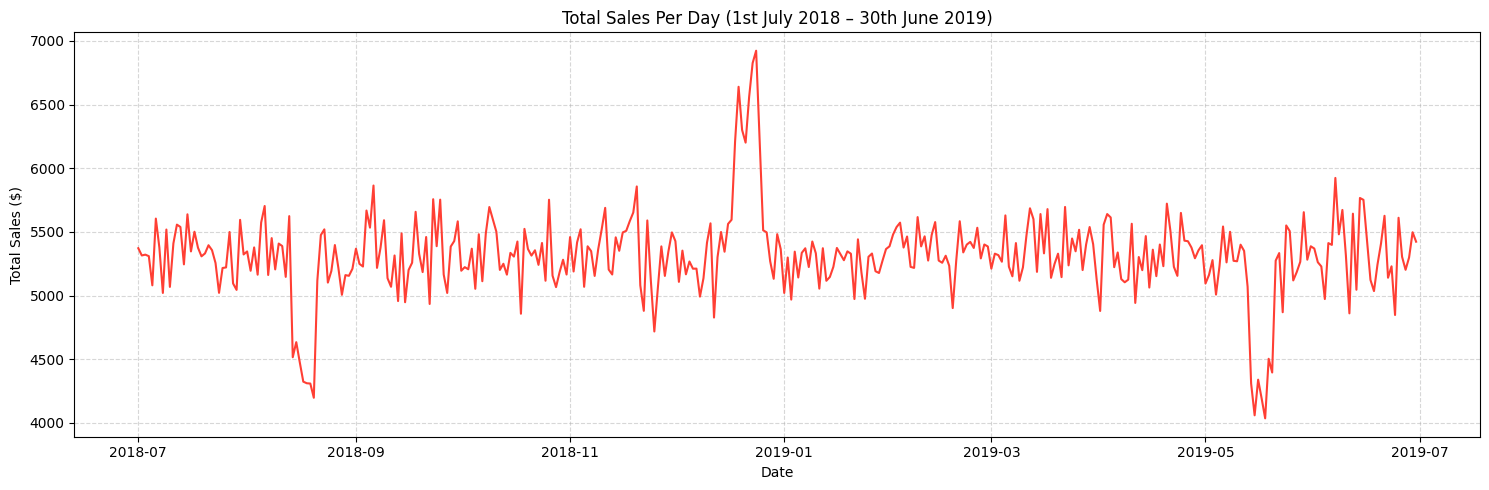

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Convert DATE column to datetime if not already
filtered_transactions_data['DATE'] = pd.to_datetime(filtered_transactions_data['DATE'])

# Step 2: Group by date and sum sales
date_sales = filtered_transactions_data.groupby('DATE')['TOT_SALES'].sum().reset_index()

# Step 3: Plot
plt.figure(figsize=(15, 5))
plt.plot(date_sales["DATE"], date_sales["TOT_SALES"], color="#ff3f34")
plt.title("Total Sales Per Day (1st July 2018 – 30th June 2019)")
plt.xlabel("Date")
plt.ylabel("Total Sales ($)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


As shown in the line graph, sales dropped to zero on December 25th, 2018 — Christmas Day — which we manually set to zero. Interestingly, there was also an all-time high in sales just before that date. To understand this pattern better, we need to analyze the transaction data for December 2018 in more detail.

In [19]:
filtered_transactions_data.columns


Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'MONTH', 'LIFESTAGE',
       'PREMIUM_CUSTOMER'],
      dtype='object')

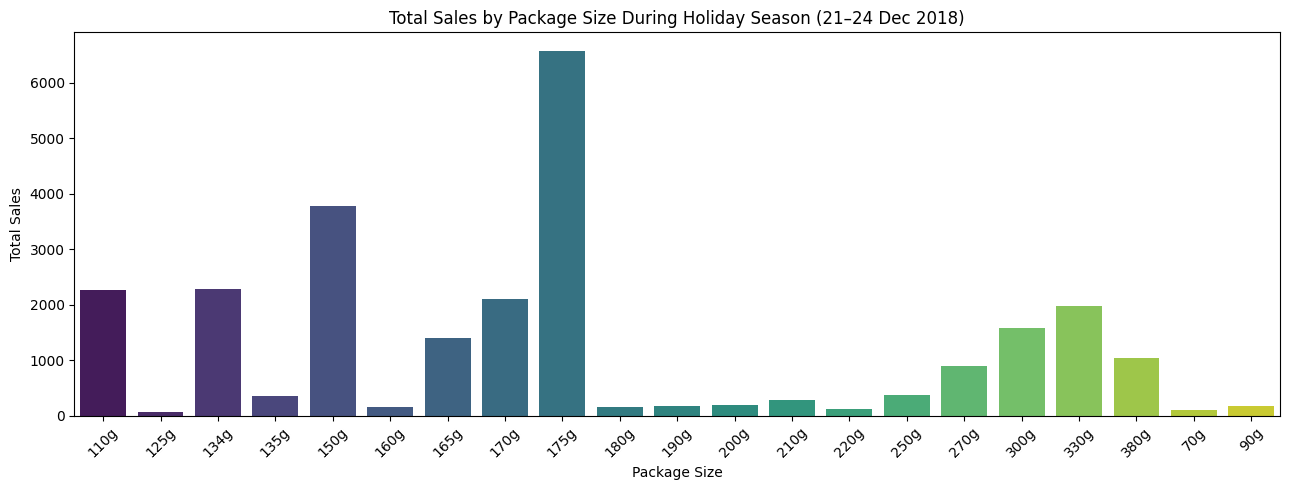

In [20]:
import re
import seaborn as sns

# Step 1: Extract package size from PROD_NAME
filtered_transactions_data['PROD_SIZE'] = filtered_transactions_data['PROD_NAME'].str.extract(r'(\d+g)')

# Step 2: Filter dates for holiday sales: 21st to 24th December 2018
holiday_sales = filtered_transactions_data[
    (filtered_transactions_data['DATE'] >= '2018-12-21') & 
    (filtered_transactions_data['DATE'] <= '2018-12-24')
]

# Step 3: Group by PROD_SIZE and sum sales
holiday_sales_grouped = holiday_sales.groupby('PROD_SIZE')['TOT_SALES'].sum().reset_index()

# Step 4: Plot the bar chart
plt.figure(figsize=(13, 5))
sns.barplot(x="PROD_SIZE", y="TOT_SALES", data=holiday_sales_grouped, palette="viridis")
plt.title("Total Sales by Package Size During Holiday Season (21–24 Dec 2018)")
plt.xlabel("Package Size")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [21]:
# Group by product name and sum quantity sold (all-time)
alltime_product_sales = (
    filtered_transactions_data.groupby('PROD_NAME')['PROD_QTY']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Top 5 most purchased (all-time)
top_5_alltime = alltime_product_sales.head(5)
print("Top 10 Most Purchased Items (All-Time):")
print(top_5_alltime)

# Bottom 5 least purchased (all-time)
bottom_5_alltime = alltime_product_sales.tail(5)
print("\nBottom 10 Least Purchased Items (All-Time):")
print(bottom_5_alltime)


Top 10 Most Purchased Items (All-Time):
                                  PROD_NAME  PROD_QTY
0    Kettle Mozzarella   Basil & Pesto 175g      6381
1  Kettle Tortilla ChpsHny&Jlpno Chili 150g      6309
2            Cobs Popd Sea Salt  Chips 110g      6277
3  Cobs Popd Swt/Chlli &Sr/Cream Chips 110g      6256
4             Tostitos Splash Of  Lime 175g      6234

Bottom 10 Least Purchased Items (All-Time):
                                  PROD_NAME  PROD_QTY
109                RRD Pc Sea Salt     165g      2702
110          Woolworths Medium   Salsa 300g      2700
111  NCC Sour Cream &    Garden Chives 175g      2682
112       WW Crinkle Cut      Original 175g      2666
113          French Fries Potato Chips 175g      2643


In [22]:
top_spenders = (
    filtered_transactions_data.groupby('LYLTY_CARD_NBR')['TOT_SALES']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

print("Top 5 Loyalty Card Holders by Total Spending:")
print(top_spenders)


Top 5 Loyalty Card Holders by Total Spending:
LYLTY_CARD_NBR
230078    138.6
63197     132.8
259009    127.2
162039    126.8
58361     124.8
Name: TOT_SALES, dtype: float64


Top Spending Loyalty Card Holders

In [23]:
segment_sales = (
    filtered_transactions_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES']
    .sum()
    .sort_values(ascending=False)
)

print("Customer Segments Ranked by Total Sales:")
print(segment_sales)


Customer Segments Ranked by Total Sales:
LIFESTAGE               PREMIUM_CUSTOMER
OLDER FAMILIES          Budget              168363.25
YOUNG SINGLES/COUPLES   Mainstream          157621.60
RETIREES                Mainstream          155677.05
YOUNG FAMILIES          Budget              139345.85
OLDER SINGLES/COUPLES   Budget              136769.80
                        Mainstream          133393.80
                        Premium             132257.15
RETIREES                Budget              113147.80
OLDER FAMILIES          Mainstream          103445.55
RETIREES                Premium              97646.05
YOUNG FAMILIES          Mainstream           92788.75
MIDAGE SINGLES/COUPLES  Mainstream           90803.85
YOUNG FAMILIES          Premium              84025.50
OLDER FAMILIES          Premium              80658.40
YOUNG SINGLES/COUPLES   Budget               61141.60
MIDAGE SINGLES/COUPLES  Premium              58432.65
YOUNG SINGLES/COUPLES   Premium              41642.10


/tmp/ipykernel_13/1565520503.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_transactions_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES']


Top Customer Segments by Sales

In [24]:
#Average Spend per Transaction
avg_spend = filtered_transactions_data['TOT_SALES'].mean()
print(f"Average Spend per Transaction: ${avg_spend:.2f}")


Average Spend per Transaction: $7.30


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Ensure date is in datetime format
filtered_transactions_data["DATE"] = pd.to_datetime(filtered_transactions_data["DATE"])

# Create RFM table
rfm = filtered_transactions_data.groupby("LYLTY_CARD_NBR").agg({
    "TOT_SALES": ["sum", "count"],
    "DATE": "max"
}).reset_index()

# Rename columns
rfm.columns = ["LYLTY_CARD_NBR", "MONETARY", "FREQUENCY", "LAST_PURCHASE_DATE"]

# Calculate Recency from last transaction to fiscal end date
rfm["RECENCY"] = (pd.to_datetime("2019-06-30") - rfm["LAST_PURCHASE_DATE"]).dt.days

# Drop unneeded column
rfm.drop(columns="LAST_PURCHASE_DATE", inplace=True)

# View top rows (optional)
rfm.head()


,LYLTY_CARD_NBR,MONETARY,FREQUENCY,RECENCY
0,1000,6.0,1,256
1,1002,2.7,1,287
2,1003,6.6,2,114
3,1004,1.9,1,240
4,1005,2.8,1,184


# 🧹 Data Cleaning Summary

1. **Initial Inspection & Understanding**  
   - Loaded the dataset and examined its structure and column names.  
   - Verified data types, especially ensuring the `DATE` column was in proper datetime format.

2. **Duplicate & Missing Values**  
   - Checked for and confirmed there were **no missing values** or **duplicate records**.

3. **Outlier Detection & Handling**  
   - Identified a suspicious transaction of **200 units** in one purchase.  
   - Removed it as an outlier to avoid skewed analysis.

4. **Filtering Transaction Types**  
   - Kept only records where `PROD_QTY >= 1`.

5. **Column Renaming**  
   - Renamed cleaned dataset to `filtered_transactions_data`.

6. **Date Coverage**  
   - Confirmed data ranges from **1st July 2018 to 30th June 2019**.  
   - Noted **25th December (Christmas Day)** is missing, likely due to store closure.

---

# 📊 Exploratory Data Analysis (EDA) Summary

1. **Sales Trend Over Time**  
   - Line plot of total daily sales shows spikes and weekly patterns.

2. **Festive Period Focus (21–24 Dec 2018)**  
   - Analyzed sales by **package size** and product types.

3. **Product Popularity**  
   - Listed **top 5 and bottom 5** most purchased products:  
     - For **entire year**  
     - For **festive period**

4. **Customer Purchase Behavior (RFM)**  
   - Created RFM table:  
     - **Recency** = Days since last purchase  
     - **Frequency** = Total transactions  
     - **Monetary** = Total spending  

---

# ✅ Conclusion

Dataset is now clean, structured, and analyzed. Task 1 sets the foundation for advanced behavioral insights in Task 2.
